# Importing Libraries

In [28]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Reading The Dataset

In [29]:
df = pd.read_csv("./nobel_laureates_data.csv")
df.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 1000 non-null   int64 
 1   category             1000 non-null   object
 2   motivation           1000 non-null   object
 3   prizeShare           1000 non-null   int64 
 4   laureateID           1000 non-null   int64 
 5   fullName             1000 non-null   object
 6   gender               1000 non-null   object
 7   born                 1000 non-null   object
 8   bornCountry          970 non-null    object
 9   bornCity             966 non-null    object
 10  died                 970 non-null    object
 11  diedCountry          652 non-null    object
 12  diedCity             646 non-null    object
 13  organizationName     736 non-null    object
 14  organizationCountry  733 non-null    object
 15  organizationCity     731 non-null    object
dtypes: int6

# Data Cleaning & Transformation 

#### Drop Duplicates

In [31]:
df = df.drop_duplicates()

#### Drop unwanted Columns : motivation, laureateID, bornCity, died, diedCountry, diedCity, organizatioName, organizationCountry, organizationCity

In [32]:
columns_to_drop = ["motivation", "laureateID", "bornCity", 
                   "died", "diedCountry", "diedCity", 
                   "organizationName", "organizationCountry", "organizationCity"] 
df = df.drop(columns_to_drop, axis=1)

In [33]:
df.head()

,year,category,prizeShare,fullName,gender,born,bornCountry
0,2023,medicine,2,Katalin Kariko,female,17-01-1955,Hungary
1,2023,economics,1,Claudia Goldin,female,1946-00-00,USA
2,2023,peace,1,Narges Mohammadi,female,21-04-1972,Iran
3,2023,literature,1,Jon Fosse,male,29-09-1959,Norway
4,2023,chemistry,3,Alexei Ekimov,male,1945-00-00,Russia


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         1000 non-null   int64 
 1   category     1000 non-null   object
 2   prizeShare   1000 non-null   int64 
 3   fullName     1000 non-null   object
 4   gender       1000 non-null   object
 5   born         1000 non-null   object
 6   bornCountry  970 non-null    object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [35]:
df.year.value_counts().reset_index(name="count").sort_values(by="year").head(10)

,year,count
88,1901,6
76,1902,7
75,1903,7
81,1904,6
98,1905,5
80,1906,6
78,1907,6
71,1908,7
68,1909,7
100,1910,5


In [36]:
df.category.value_counts().reset_index(name="count").sort_values(by="count", ascending=False)

,category,count
0,medicine,227
1,physics,225
2,chemistry,194
3,peace,141
4,literature,120
5,economics,93


In [37]:
df.prizeShare.value_counts().reset_index(name="count").sort_values(by="count", ascending=False)

,prizeShare,count
0,1,358
1,2,331
2,3,237
3,4,74


In [38]:
df.bornCountry.value_counts().reset_index(name="count").sort_values(by="count", ascending=False).head(10)

,bornCountry,count
0,USA,292
1,United Kingdom,90
2,Germany,84
3,France,61
4,Sweden,30
5,Poland,29
6,Russia,29
7,Japan,28
8,Canada,21
9,Italy,20


#### Drop Organizations from dataset

In [39]:
df.gender.value_counts().reset_index(name="count").sort_values(by="count", ascending=False)

,gender,count
0,male,905
1,female,65
2,org,30


In [40]:
df = df[df.gender != "org"]

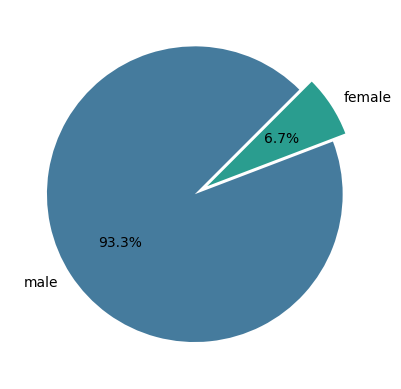

In [137]:
plt.pie(list(df.gender.value_counts()), 
        labels=df.gender.unique()[::-1], 
        autopct='%1.1f%%',
        explode=(0,0.1),
        startangle=45,
        colors=["#457b9d","#2a9d8f"])
plt.show()

In [41]:
df.head()

,year,category,prizeShare,fullName,gender,born,bornCountry
0,2023,medicine,2,Katalin Kariko,female,17-01-1955,Hungary
1,2023,economics,1,Claudia Goldin,female,1946-00-00,USA
2,2023,peace,1,Narges Mohammadi,female,21-04-1972,Iran
3,2023,literature,1,Jon Fosse,male,29-09-1959,Norway
4,2023,chemistry,3,Alexei Ekimov,male,1945-00-00,Russia


#### Cleaning and Parsing Born Date

In [42]:
df.born.head(11)

0     17-01-1955
1     1946-00-00
2     21-04-1972
3     29-09-1959
4     1945-00-00
5     1943-00-00
6     1961-00-00
7     16-08-1958
8     17-05-1962
9     23-07-1941
10      7/9/1959
Name: born, dtype: object

#### Replace "/" with "-"

In [43]:
df.born = df.born.apply(lambda x: x.replace("/","-"))

#### Replace yyyy-00-00 with yyyy-01-01

In [44]:
df.born = df.born.apply(lambda x: x.replace("-00-00","-01-01"))

#### Type Casting

In [45]:
df.dtypes

year            int64
category       object
prizeShare      int64
fullName       object
gender         object
born           object
bornCountry    object
dtype: object

#### Convert "born" to date type

In [46]:
df.born = pd.to_datetime(df.born, format='mixed', errors="raise")

#### Rearrange Columns
1. fullName
2. gender
3. born
4. bornCountry
5. category
6. prizeShare
7. year

In [47]:
df = df.loc[:,['fullName', 'born', 'bornCountry', 'gender', 'year', 'category', 'prizeShare']]
df.head()

,fullName,born,bornCountry,gender,year,category,prizeShare
0,Katalin Kariko,1955-01-17,Hungary,female,2023,medicine,2
1,Claudia Goldin,1946-01-01,USA,female,2023,economics,1
2,Narges Mohammadi,1972-04-21,Iran,female,2023,peace,1
3,Jon Fosse,1959-09-29,Norway,male,2023,literature,1
4,Alexei Ekimov,1945-01-01,Russia,male,2023,chemistry,3


#### Sort Data

In [48]:
df = df.sort_values(["year","category"], ascending=False)
df.head()

,fullName,born,bornCountry,gender,year,category,prizeShare
7,Anne L Huillier,1958-08-16,France,female,2023,physics,3
8,Ferenc Krausz,1962-05-17,Hungary,male,2023,physics,3
9,Pierre Agostini,1941-07-23,Tunisia,male,2023,physics,3
2,Narges Mohammadi,1972-04-21,Iran,female,2023,peace,1
0,Katalin Kariko,1955-01-17,Hungary,female,2023,medicine,2


#### Create Age Column

In [49]:
df["age"] = df.year - df.born.dt.year
df.head()

,fullName,born,bornCountry,gender,year,category,prizeShare,age
7,Anne L Huillier,1958-08-16,France,female,2023,physics,3,65
8,Ferenc Krausz,1962-05-17,Hungary,male,2023,physics,3,61
9,Pierre Agostini,1941-07-23,Tunisia,male,2023,physics,3,82
2,Narges Mohammadi,1972-04-21,Iran,female,2023,peace,1,51
0,Katalin Kariko,1955-01-17,Hungary,female,2023,medicine,2,68


#### Null Values

In [50]:
df.isnull().sum()

fullName       0
born           0
bornCountry    0
gender         0
year           0
category       0
prizeShare     0
age            0
dtype: int64

In [51]:
df.head()

,fullName,born,bornCountry,gender,year,category,prizeShare,age
7,Anne L Huillier,1958-08-16,France,female,2023,physics,3,65
8,Ferenc Krausz,1962-05-17,Hungary,male,2023,physics,3,61
9,Pierre Agostini,1941-07-23,Tunisia,male,2023,physics,3,82
2,Narges Mohammadi,1972-04-21,Iran,female,2023,peace,1,51
0,Katalin Kariko,1955-01-17,Hungary,female,2023,medicine,2,68


# EDA

In [52]:
df[(df.year==2023) & (df.category.isin(["chemistry", "physics"]))]

,fullName,born,bornCountry,gender,year,category,prizeShare,age
7,Anne L Huillier,1958-08-16,France,female,2023,physics,3,65
8,Ferenc Krausz,1962-05-17,Hungary,male,2023,physics,3,61
9,Pierre Agostini,1941-07-23,Tunisia,male,2023,physics,3,82
4,Alexei Ekimov,1945-01-01,Russia,male,2023,chemistry,3,78
5,Louis Brus,1943-01-01,USA,male,2023,chemistry,3,80
6,Moungi Bawendi,1961-01-01,France,male,2023,chemistry,3,62


## Identification des Tendances Historiques :

#### Analyser l'évolution du nombre total de prix Nobel décernés au fil des années.

In [53]:
laureates = df.year.value_counts().reset_index(name="numOfLaureates").sort_values(by="year")
laureates.head()

,year,numOfLaureates
87,1901,6
67,1902,7
66,1903,7
97,1904,5
98,1905,5


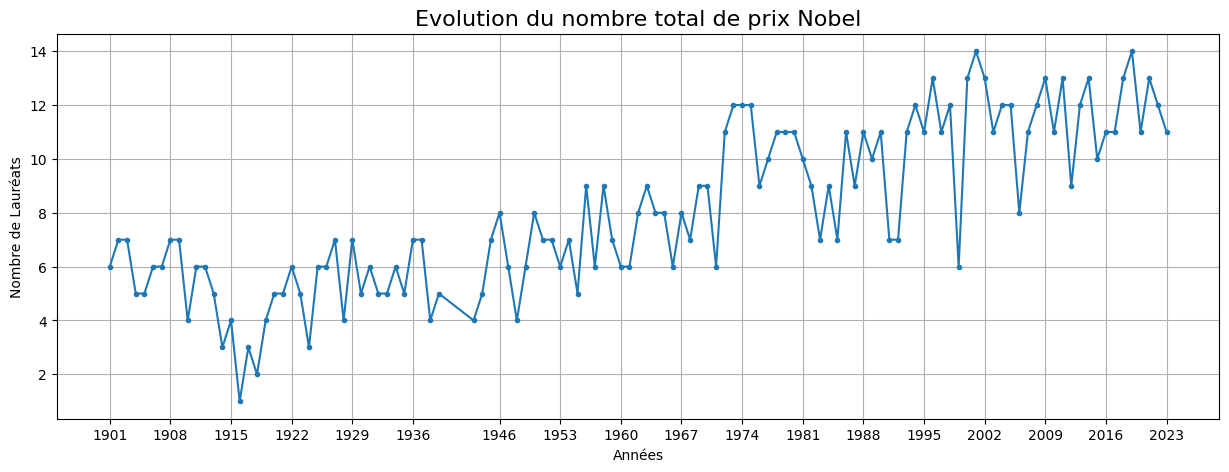

In [54]:
plt.figure(figsize=(15,5))
plt.plot(laureates.year, laureates.numOfLaureates, marker=".")
plt.title("Evolution du nombre total de prix Nobel", fontsize=16)
plt.xlabel("Années")
plt.ylabel("Nombre de Lauréats")
plt.xticks(laureates.year[::7])
plt.grid(True)
plt.show()

#### Identifier les catégories de prix qui ont connu des variations significatives.

In [55]:
categories = df.groupby(["category", "year"])["category"].count().reset_index(name="count")
categories.head()

,category,year,count
0,chemistry,1901,1
1,chemistry,1902,1
2,chemistry,1903,1
3,chemistry,1904,1
4,chemistry,1905,1


In [56]:
chemistry_df = categories[categories.category=="chemistry"]
physics_df = categories[categories.category=="physics"]
economics_df = categories[categories.category=="economics"]
literature_df = categories[categories.category=="literature"]
peace_df = categories[categories.category=="peace"]
medicine_df = categories[categories.category=="medicine"]

In [57]:
chemistry_df.sort_values(by=['count','year'], ascending=False).head()

,category,year,count
114,chemistry,2023,3
113,chemistry,2022,3
110,chemistry,2019,3
109,chemistry,2018,3
108,chemistry,2017,3


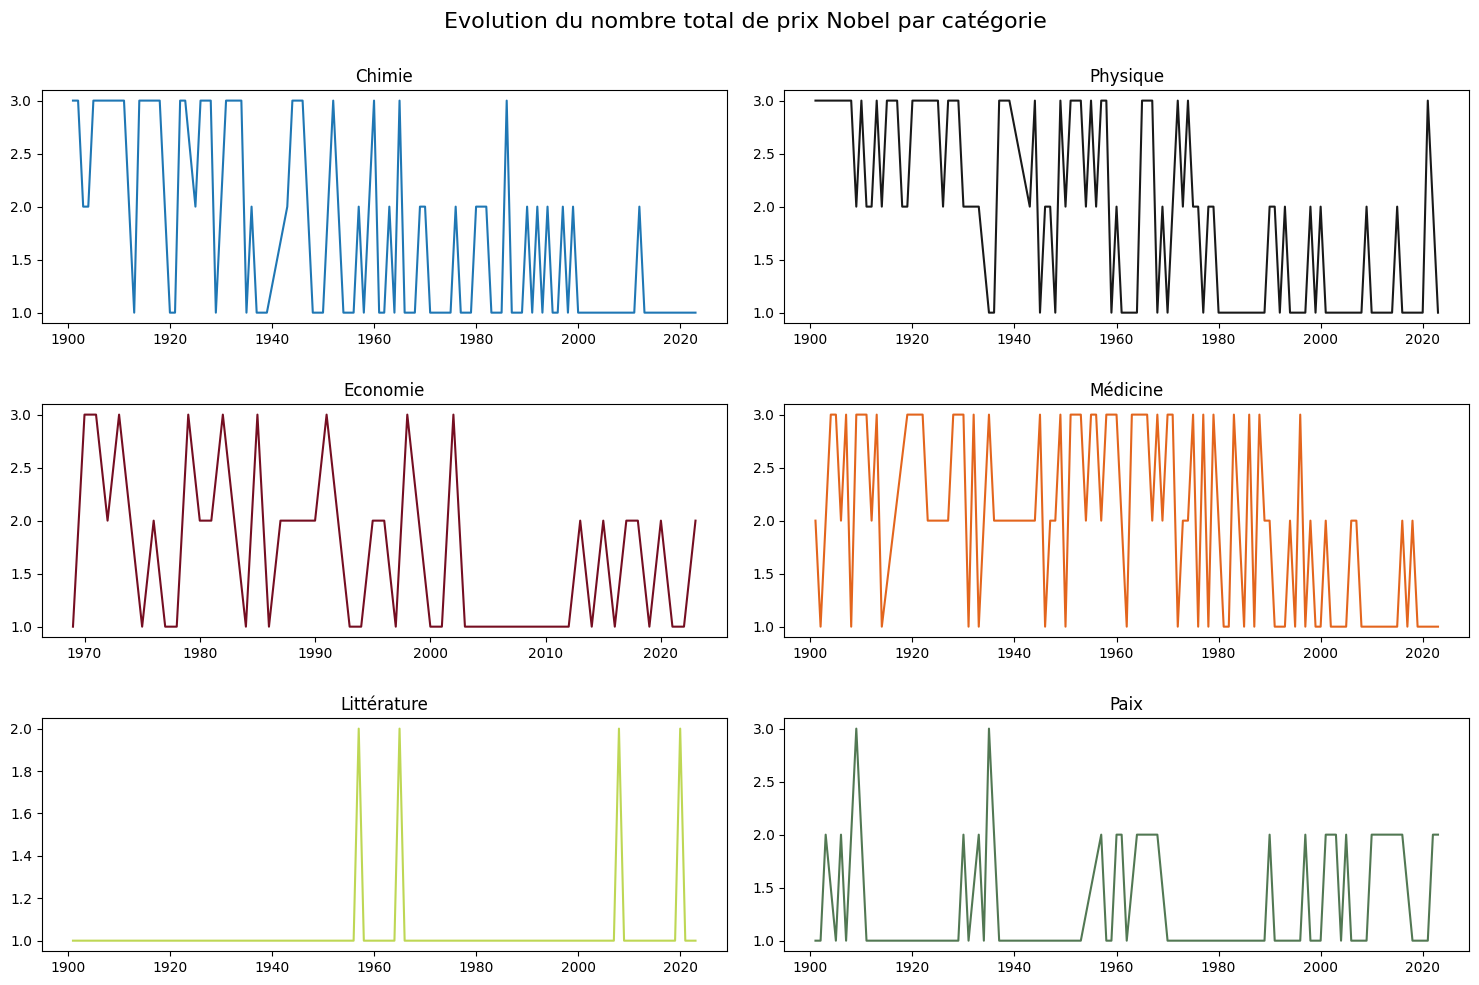

In [58]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(15, 10))
fig.suptitle('Evolution du nombre total de prix Nobel par catégorie', fontsize=16)
fig.tight_layout(h_pad=4)
plt.subplots_adjust(top=0.90)

ax1.plot(list(chemistry_df.year.unique()[::-1]), chemistry_df["count"])
ax1.set_title("Chimie")

ax2.plot(list(physics_df.year.unique()[::-1]), physics_df["count"], color="#191919")
ax2.set_title("Physique")

ax3.plot(list(economics_df.year.unique()[::-1]), economics_df["count"], color="#750E21")
ax3.set_title("Economie")

ax4.plot(list(medicine_df.year.unique()[::-1]), medicine_df["count"], color="#E3651D")
ax4.set_title("Médicine")

ax5.plot(list(literature_df.year.unique()[::-1]), literature_df["count"], color="#BED754")
ax5.set_title("Littérature")

ax6.plot(list(peace_df.year.unique()[::-1]), peace_df["count"], color="#527853")
ax6.set_title("Paix")

plt.show()

#### Mettre en évidence les années marquantes avec des pics ou des creux de remise des prix.

## Analyse Démographique des Lauréats

#### Examiner la distribution des lauréats par âge, en particulier les tendances générationnelles

In [59]:
df.sort_values(by='age').head()

,fullName,born,bornCountry,gender,year,category,prizeShare,age
114,Malala Yousafzai,1997-12-07,Pakistan,female,2014,peace,2,17
916,Lawrence Bragg,1890-03-31,Australia,male,1915,physics,2,25
68,Nadia Murad,1993-01-01,Iraq,female,2018,peace,2,25
815,Carl D. Anderson,1905-03-09,USA,male,1936,physics,2,31
833,Werner Heisenberg,1901-05-12,Germany,male,1932,physics,1,31


In [60]:
df.describe()

,born,year,prizeShare,age
count,970,970.00000,970.000000,970.000000
mean,1913-10-12 10:02:43.298969088,1973.54433,2.044330,60.256701
min,1817-11-30 00:00:00,1901.00000,1.000000,17.000000
25%,1894-01-11 12:00:00,1949.25000,1.000000,51.000000
50%,1918-08-11 12:00:00,1979.00000,2.000000,60.500000
75%,1939-07-08 18:00:00,2002.75000,3.000000,69.000000
max,1997-12-07 00:00:00,2023.00000,4.000000,97.000000
std,NaN,34.52309,0.947047,12.634624


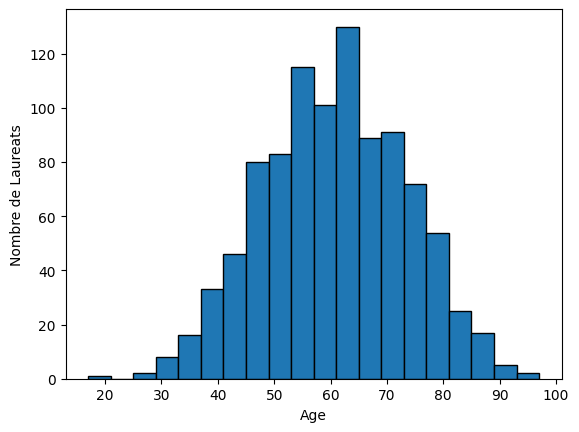

In [70]:
plt.hist(df.age, bins=20, edgecolor='black')
plt.Figure(figsize=(15,10))
plt.xlabel("Age")
plt.ylabel("Nombre de Laureats")
plt.show()

#### Identifier les périodes où des groupes d'âge spécifiques ont été particulièrement honorés

In [62]:
period = 10
numYears = len(df.year.unique())
numYears/period

12.0

In [75]:
years = list(df.year.unique())[::-1]

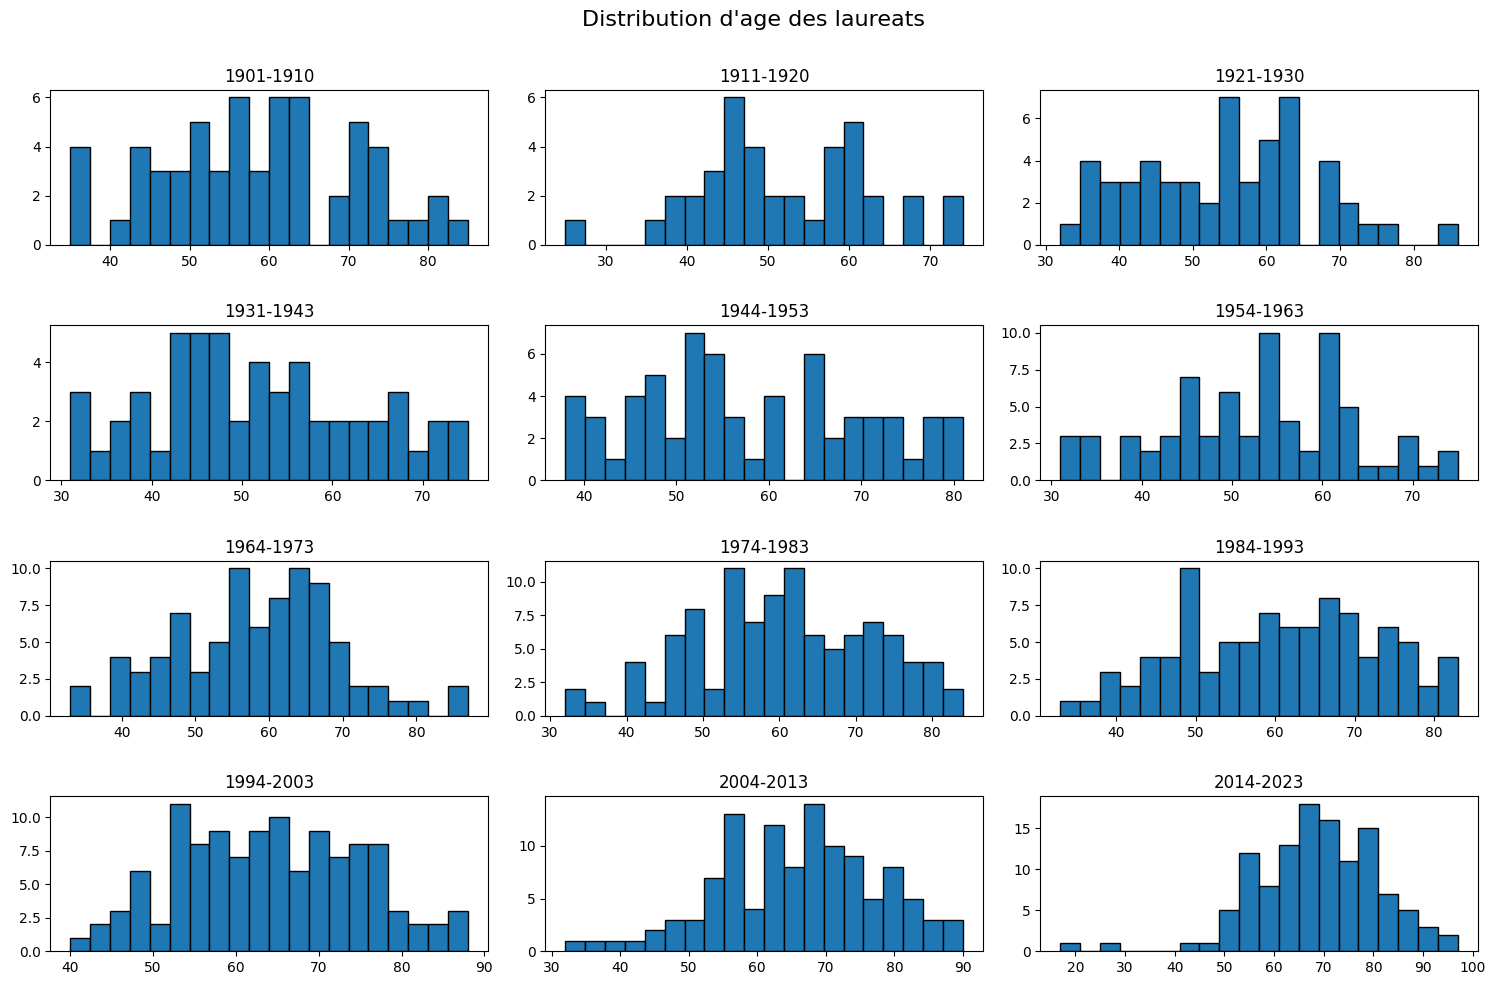

In [76]:
i = 0
fig, axs = plt.subplots(4,3, figsize=(15,10))
fig.suptitle("Distribution d'age des laureats", fontsize=16)
fig.tight_layout(h_pad=4)
plt.subplots_adjust(top=0.90)
for row in range(4):
    for column in range(3):
        d = df[df.year.isin(years[i:i+10])]
        axs[row, column].hist(d.age, bins=20, edgecolor='black')
        axs[row, column].set_title(f"{min(d.year)}-{max(d.year)}")
        i+=10
plt.show()

#### Évaluer si les catégories de prix ont des profils d'âge distincts

In [90]:
catgs = ['physics', 'chemistry', 'economics', 'medicine', 'literature', 'peace',]
print(catgs, "-->" ,len(catgs))

['physics', 'chemistry', 'economics', 'medicine', 'literature', 'peace'] --> 6


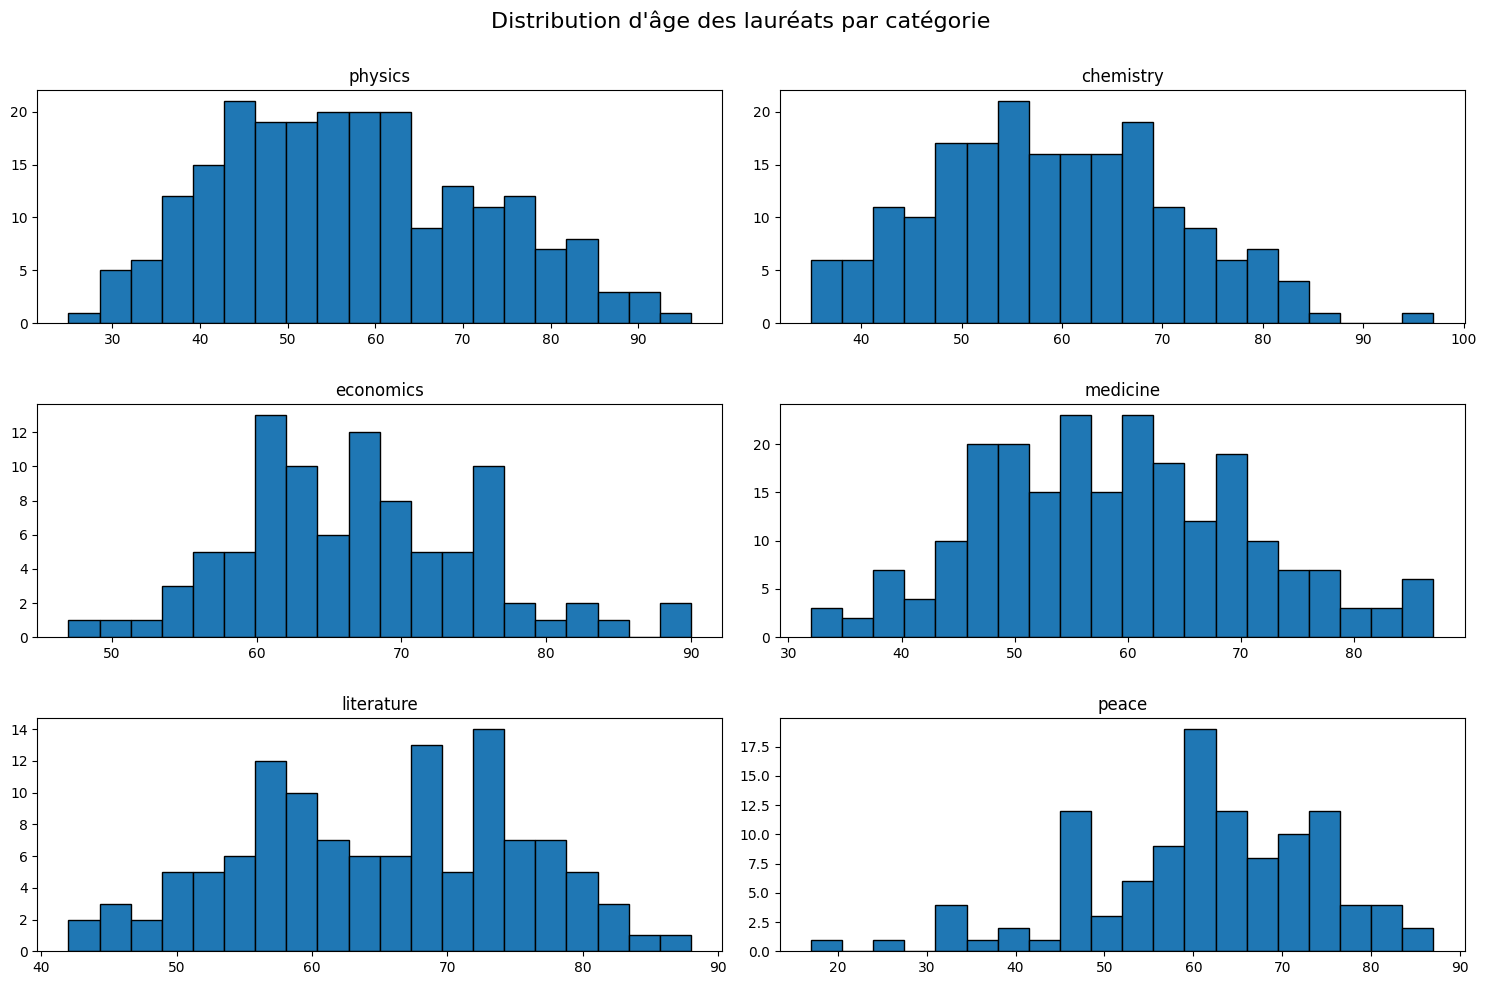

In [93]:
i = 0
fig, axs = plt.subplots(3,2, figsize=(15,10))
fig.suptitle("Distribution d'âge des lauréats par catégorie", fontsize=16)
fig.tight_layout(h_pad=4)
plt.subplots_adjust(top=0.90)
for row in range(3):
    for column in range(2):
        d = df[df.category==catgs[i]]
        axs[row, column].hist(d.age, bins=20, edgecolor='black')
        axs[row, column].set_title(f"{catgs[i]}")
        i+=1
plt.show()

# Profil Géographique des Lauréats

#### Cartographier la répartition géographique des lauréats par pays